# DI 501: Introduction to Data Informatics 

## Assignment 1

### Due: March 24, Sunday by 23:30
---

### Submission and Grading Principles

**Assignment Submission Guidelines:**

* Submit your assignments via the assignment module on [ODTUClass](https://odtuclass.metu.edu.tr).

* You will work on this file, and rename it as "*name_surname_a1.ipynb*" (e.g., "*volga_sezen_a1.ipynb*").

* Late submissions will be accepted until March 28, Thursday by 23:30, with a 10% penalty per day.

* **<font color=#C91515>This is an individual assignment; do not collaborate, and uphold academic integrity principles.</font>**

* Offer insightful commentary about your results. Data understanding relies on your reasoning; not just numbers, tables, or graphics.
<br>**<font color=#C91515>Failing to do so will result in grade penalties. (Up to 50% of a given question.)</font>**

* Use multiple code blocks when multiple outputs are necessary, but graphs have to be compacted by using subplots whenever appropriate.

* Place your comments in markdown blocks (like this one), and use markdown notation used here to make reading easier. \
*(Double click here to look at the markdown code. Press esc to go back.)*

**Make sure printouts and graphs are visible before submission.**

------------

### The aim of this assignment is getting you familiar with:

* Python and Jupyter notebooks,

* Data cleaning,

* Descriptive statistics interpretation,

* Visualization methods, and

* Statistical tests

------------

### Dataset Description

In this assignment you will work with data from "ELODIE library V3.1" which is a catalogue of stars in the sky.

This dataset is a table which includes several attributes of stars derived from observations conducted at Haute-Provence Observatory in France. 

Each row represents an observation, and you will analyze various attributes associated with them.

#### General Characteristics & Metadata

| Variable Name | Explanation |
|---|---|
| Name | Identifier of the star observed |
| SpType | Spectral class of the star [$^{1}$](#0-environment-setup)|
| qF | Quality of flux calibration (3=good)[$^{2}$](#0-environment-setup) |
| Airm | Airmass at mid-time of observation |


#### Star Parameters

| Variable Name | Explanation | Unit/Range |
|---|---|---|
| Vr | Heliocentric radial velocity of the star [$^{3}$](#0-environment-setup) | $\text{km/s}$ |
| Teff | Effective temperature of the star surface | $\text{Kelvin}$ |
| q_Teff | Quality flag on Teff | $[-1,4]$ |
| logg | Decimal log of surface gravity | $\text{cm/s}^{2}$ |
| q_logg | Quality flag on logg | $[-1,4]$ |
| [Fe/H] | Metallicity [$^{4}$](#0-environment-setup) | $\text{Dex, 10}^{x}$ |
| q_[Fe/H] | Quality flag on [Fe/H] | $[-1,4]$ |
| TeffM | Estimated effective temperature | - |
| loggM | Estimated log of surface gravity | - |
| [Fe/H]M | Estimated metallicity | - |

#### Absorption Indices [$^{5}$](#0-environment-setup) 


| Variable Name | Explanation | Unit |
|---|---|---|
| Hbeta | Strength of absorption at 486.1 nm <br> (Balmer series of Hydrogen at n=3) | 0.1 nm |
| Fe5270 | Strength of absorption at 527.0 nm | 0.1 nm | 
| Fe5709 | Strength of absorption at 570.9 nm | 0.1 nm | 
| TiO1 | Strength of absorption at 620-630 nm | mag | 

------------

#### Notes:

1. Made up of three components, temperature class (B1 for ex.), luminosity class (Roman numeral), and other reported oddities.

    > First two are labeled according to Morgan-Keenan-Kellman classification system. <br>
    > 
    > * The temperature class has two parts, a letter (main spectral type), and a digit (subtype).  
    >   * The main sequence follows this order: O, B, A, F, G, K, M, excluding newer types. <br> The sun is classified as G2V. Here 2 signifies the sun is closer to an F star than a K star in temperature. <br>
    >
    > 
    > * Luminosity class is shown by roman numerals from I to VI, with I having a or b suffix only. <br> 
    >   I(a/b) is a hypergiant, V is a dwarf and VI is subdwarf for example. **(Subdwarf is sometimes expressed with sd prefix.)**

2. This is useful to determine the reliability of spectral indices and estimated parameters. <br> Along with other quality flags, their meanings can be found in the readme file.

3. The speed at which the star is moving toward or away from Earth. Estimated by the doppler effect.

4. Proportion of iron to hydrogen in the star compared to the Sun.

5. If an element is present in a star's interior it will absorb light at different frequencies. <br> Note that elements absorb light at many frequencies (sometimes even ranges). <br> For this assignment a representative sample of them were selected.

----------

### 0) Environment setup
Import numpy, pandas, matplotlib, seaborn, statsmodels and scipy, along with other libraries you may utilize.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew
from scipy.stats import shapiro
import math

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\2140439316.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### 1) Initial inspection (5p)

1. Load the data given with the correct separator.

1. Show how many observations and features are present.

1. Then show the last 6 rows.

In [2]:
df = pd.read_csv("C:/Users/ibrah/OneDrive/Masaüstü/DI501/assignments/1st_assignment/elodie.csv", delimiter=';')

In [3]:
df.shape #There are 1959 observations (rows) and 18 features (columns) in the DataFrame.

(1959, 18)

In [4]:
num_obs, num_ftr = df.shape
print("Number of observations:", num_obs)
print("Number of features:", num_ftr)

Number of observations: 1959
Number of features: 18


In [5]:
df.tail(6)

,Name,SpType,qF,Airm,Vr,Teff,q_Teff,logg,q_logg,[Fe/H],q_[Fe/H],TeffM,loggM,[Fe/H]M,Hbeta,Fe5270,Fe5709,TiO1
1953,SUN,G2V,3,1.24,-16.73,5777.0,4,4.44,1,0.0,4,5729.0,4.24,-0.05,2.5445,2.0535,0.5788,0.0252
1954,SUN,G2V,1,1.08,-22.56,5777.0,4,4.44,1,0.0,4,5727.0,4.22,-0.08,2.5195,1.9538,0.6371,0.0156
1955,SUN,G2V,3,1.66,30.37,5777.0,4,4.44,1,0.0,4,5719.0,4.26,-0.04,2.4798,2.0709,0.5591,0.0207
1956,SUN,G2V,3,1.70,30.40,5777.0,4,4.44,1,0.0,4,5723.0,4.27,-0.04,2.4892,2.0414,0.5745,0.0205
1957,SUN,G2V,3,1.38,15.66,5777.0,4,4.44,1,0.0,4,5731.0,4.30,-0.03,2.5692,2.0351,0.6855,0.0126
1958,SUN,G2V,3,1.33,16.10,5777.0,4,4.44,1,0.0,4,5731.0,4.27,-0.03,2.5142,2.0535,0.5831,0.0126


### 2) Data cleaning and augmentation (10p)

1.  * Define a new column called "spec" that only consists of the main spectral class. (First capital letter in SpType) 
    
    * Then, generate a column called "sub" that only consists of the subclass. (First digit in SpType).
    
    * Combine them using string addition to create a final column called "type".

3. Normalize column names to be lowercase AND rid them of special characters.

4. Show that your solutions worked by calling the info method of the dataframe.

*Hint: You will benefit a lot from using [regular expressions](https://images.datacamp.com/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf), [lambda functions](https://www.datacamp.com/tutorial/python-lambda) and [`pd.Series.str.extract`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html) here.*

In [6]:
df['spec'] = df['SpType'].str.extract(r'([A-Z])')
df['sub'] = df['SpType'].str.extract(r'(\d)')
df['type'] = df['spec'] + df['sub']

df.columns =  df.columns.str.lower().str.replace('[^a-zA-Z0-9]', '')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1959 non-null   object 
 1   sptype    1959 non-null   object 
 2   qf        1959 non-null   int64  
 3   airm      1959 non-null   float64
 4   vr        1959 non-null   float64
 5   teff      1959 non-null   float64
 6   q_teff    1959 non-null   int64  
 7   logg      1959 non-null   float64
 8   q_logg    1959 non-null   int64  
 9   [fe/h]    1959 non-null   float64
 10  q_[fe/h]  1959 non-null   int64  
 11  teffm     1959 non-null   float64
 12  loggm     1959 non-null   float64
 13  [fe/h]m   1959 non-null   float64
 14  hbeta     1959 non-null   float64
 15  fe5270    1959 non-null   float64
 16  fe5709    1959 non-null   float64
 17  tio1      1959 non-null   float64
 18  spec      1959 non-null   object 
 19  sub       1940 non-null   object 
 20  type      1940 non-null   obje

* DataFrame comprises 1959 observations indexed from 0 to 1958.
* It consists of 21 columns.
* Each column is presented with its non-null count and data type.
* Non-Null Count indicates the completeness of data in each column.
* Memory Usage reflects the memory utilized by the DataFrame, approximately 321.5 KB.

### 3) Interpreting descriptive statistics (15p)

Just by looking at descriptive statistics (and no graphs yet) group each numeric attribute into one of three categories:

* Left-skewed
* Symmetric
* Right-skewed 

For some columns this decision will be easy, while for others not so much. <br>
**Explain which ones were difficult, and why?** *Quantiles and maxima/minima will help you with this.*

*You don't have to give definite answers, but rather explain which category feels closest.*

In [7]:
df.describe()

,qf,airm,vr,teff,q_teff,logg,q_logg,[fe/h],q_[fe/h],teffm,loggm,[fe/h]m,hbeta,fe5270,fe5709,tio1
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.00000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,2.636549,1.306840,0.020648,7438.501276,1.37315,3.259607,0.982134,-1.159117,1.067892,7857.964267,3.227902,-0.215375,3.497836,1.684893,0.480870,0.015804
std,0.625155,0.257624,116.768651,5559.820225,1.37878,6.192702,0.157182,9.696449,1.348394,6531.506702,6.191949,0.518323,2.336659,1.207112,0.459491,0.051446
min,1.000000,1.000000,-397.930000,3183.000000,0.00000,-99.000000,-1.000000,-99.000000,-1.000000,3106.000000,-99.000000,-2.780000,-3.904900,-0.797700,-1.604700,-0.053300
25%,2.000000,1.080000,-27.095000,5228.500000,0.00000,3.270000,1.000000,-0.250000,0.000000,5192.000000,3.215000,-0.300000,1.676900,0.897600,0.123950,0.003700
50%,3.000000,1.290000,-7.270000,5970.000000,1.00000,3.980000,1.000000,-0.070000,0.000000,5922.000000,3.930000,-0.100000,2.869000,1.466700,0.386500,0.007600
75%,3.000000,1.430000,11.380000,7050.000000,2.00000,4.200000,1.000000,0.000000,2.000000,7305.000000,4.230000,0.030000,4.823550,2.564700,0.779900,0.012700
max,3.000000,3.830000,999.990000,49863.000000,4.00000,4.880000,1.000000,1.000000,4.000000,49863.000000,4.910000,1.300000,9.414500,4.893800,1.945800,0.649400


In [8]:
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Exclude the categorical columns based on their names
cat_cols_to_exclude = ['qf', 'q_teff', 'q_logg', 'q_[fe/h]']
num_cols = num_cols.drop(columns=cat_cols_to_exclude, errors='ignore')

Quality flags (qf, q_teff, q_logg, q_[fe/h]): These columns represent the quality of certain measurements or estimations related to the star parameters such as effective temperature, surface gravity, and metallicity. They are categorical variables with values ranging from -1 to 4, indicating the quality of the corresponding measurement or estimation. Since they are not numeric attributes that can be measured or compared in terms of skewness, we excluded them from the analysis.

In [9]:
descriptive_stats = num_cols.describe()

skewness_categories = {}

for column in descriptive_stats.columns:
    mean = descriptive_stats.loc['mean', column]
    median = descriptive_stats.loc['50%', column]
    q1 = descriptive_stats.loc['25%', column]
    q3 = descriptive_stats.loc['75%', column]

    # Calculate the spread between quartiles
    spread_below_median = median - q1
    spread_above_median = q3 - median

    # Determine skewness category
    if mean < median and spread_below_median > spread_above_median:
        skewness_categories[column] = 'Left-skewed'
    elif mean > median and spread_above_median > spread_below_median:
        skewness_categories[column] = 'Right-skewed'
    else:
        skewness_categories[column] = 'Symmetric'

for column, category in skewness_categories.items():
    print(f"{column}: {category}")

airm: Symmetric
vr: Symmetric
teff: Right-skewed
logg: Left-skewed
[fe/h]: Left-skewed
teffm: Right-skewed
loggm: Left-skewed
[fe/h]m: Left-skewed
hbeta: Right-skewed
fe5270: Right-skewed
fe5709: Right-skewed
tio1: Right-skewed


Left-skewed: Mean < Median, and minimum values are significantly lower than the first quartile.

Symmetric: Mean ≈ Median, and the spread of data around the median appears balanced.

Right-skewed: Mean > Median, and maximum values are significantly higher than the third quartile.

* logg (Decimal log of surface gravity): The presence of extreme values, such as the minimum value of -99, distorts the distribution, making it challenging to determine the true skewness based solely on quartiles and measures of central tendency.

* [fe/h] (Metallicity): Similar to logg, the distribution's shape is affected by extreme values, particularly the minimum value of -99. The spread between the minimum value and the first quartile may be disproportionately large compared to the spread between the third quartile and the maximum value, introducing ambiguity in the interpretation.

* loggm (Estimated log of surface gravity): This attribute suffers from the same issue as logg, with extreme values such as the minimum value of -99 distorting the distribution.

* [fe/h]m (Estimated metallicity): Analogous to [fe/h], the distribution of estimated metallicity is influenced by extreme values, particularly the minimum value of -99.

* fe5270 (Strength of absorption at 527.0 nm): The presence of outliers complicates skewness assessment, with indications of right skewness but uncertainty due to extreme values.

* fe5709 (Strength of absorption at 570.9 nm): Similar to fe5270, outliers affect skewness evaluation, introducing ambiguity despite hints of right skewness.

* tio1 (Strength of absorption at 620-630 nm): Skewness interpretation is challenging due to outliers, despite suggestions of right skewness from quartile spreads.

In summary, the difficulty in categorization arises from the balance between the spread of data on either side of the median and the presence of outliers or extreme values, which can influence the interpretation of skewness.

### 4) Visualizing distributions (15p)

1. For numeric attributes: 
    * Visualize the distributions of each and determine whether they are close to a gaussian distribution or not.
    * If a distribution has abnormal features, note them down and explain what they are. 

2. For categorical attributes:
    * Report how many times each star was observed.
    * For each unique star, visualize the frequency distribution of their main class and type.

*You can use subplots and loops to put multiple graphs inside the same figure.*

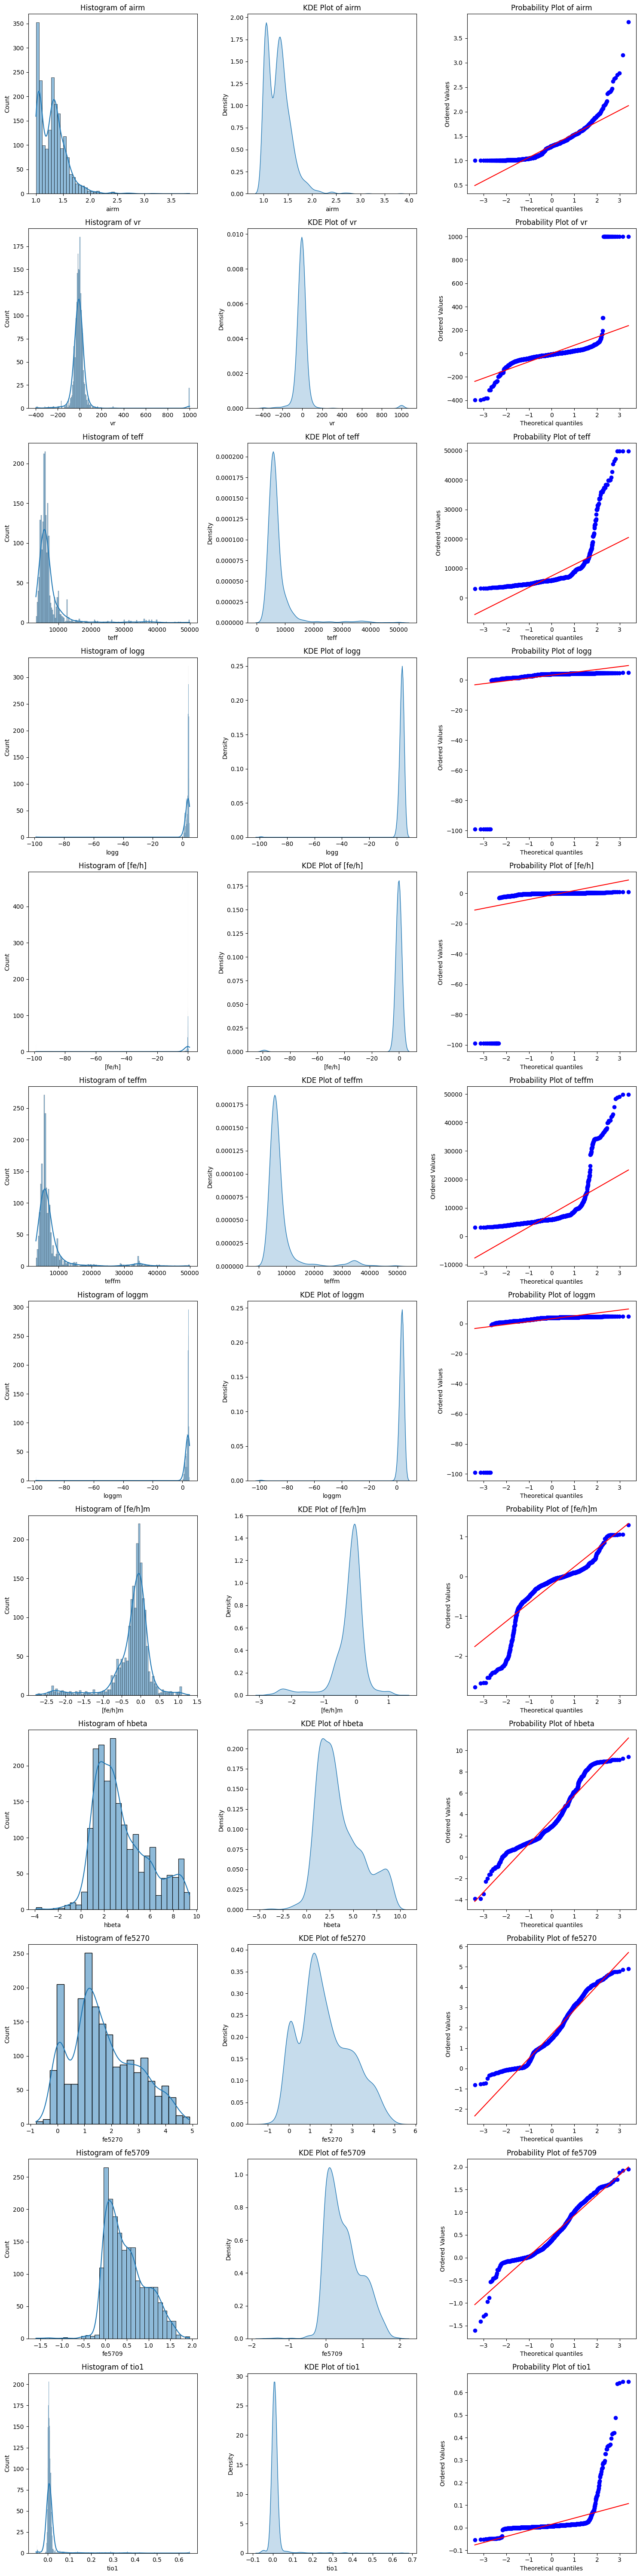

In [10]:
num_cols_count = len(num_cols.columns)
fig, axes = plt.subplots(num_cols_count, 3, figsize=(15, num_cols_count * 5))

# Plot histograms, KDE plots, and probability(Q-Q Plot) plots for each numeric attribute
for i, column in enumerate(num_cols.columns):
    sns.histplot(data=num_cols, x=column, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {column}')

    sns.kdeplot(data=num_cols, x=column, ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')

    stats.probplot(num_cols[column], dist="norm", plot=axes[i, 2])
    axes[i, 2].set_title(f'Probability Plot of {column}')

plt.tight_layout()
plt.show()

* airm: The QQ plot shows deviations from the diagonal line, particularly at the tails, indicating non-normality. The KDE plot suggests bimodal behavior, indicating the presence of multiple subgroups in the data.

* vr: Displays numerous outliers, particularly at higher values, evident from the deviation of data points from the 45-degree line on the QQ plot. The KDE plot shows a prominent peak, indicative of high-density regions within the distribution..

* teff: Demonstrates a right-skewed distribution, with deviations from the theoretical quantiles axis observed at various points on the QQ plot. Notably, the KDE plot displays a distinct peak, reflecting concentrated data points at specific values.

* logg: , [fe/h], teffm, loggm, [fe/h]m: These attributes exhibit deviations from normality in both QQ and KDE plots, indicating non-normality and skewness.

* hbeta: Deviations from normality are observed in the QQ plot, albeit less pronounced compared to other attributes.

* fe5270, fe5709: These attributes exhibit deviations from normality, particularly at the extremes, but are relatively closer to the diagonal line in QQ plots.

* tio1: Deviations from normality are observed in the QQ plot, particularly at higher quantiles, indicating non-normality. The KDE plot suggests a non-normal distribution, with data points concentrated at certain values and tails extending in both directions.

In [11]:
shapiro_results = {}
for column in num_cols.columns:
    try:
        stat, p_value = shapiro(num_cols[column])
        shapiro_results[column] = {'Statistic': stat, 'p-value': p_value, 'Gaussian?': p_value > 0.05}
    except ValueError as e:
        print(f"Error processing column '{column}': {e}")

for column, result in shapiro_results.items():
    print(f"{column}: Shapiro-Wilk test statistic = {result['Statistic']}, p-value = {result['p-value']}, Gaussian? = {result['Gaussian?']}")

airm: Shapiro-Wilk test statistic = 0.873893912452832, p-value = 3.77439673314494e-37, Gaussian? = False
vr: Shapiro-Wilk test statistic = 0.3641351930430359, p-value = 1.3681239891930221e-63, Gaussian? = False
teff: Shapiro-Wilk test statistic = 0.4825531964287948, p-value = 8.138188988448935e-60, Gaussian? = False
logg: Shapiro-Wilk test statistic = 0.09433126355549182, p-value = 2.4066843536237875e-70, Gaussian? = False
[fe/h]: Shapiro-Wilk test statistic = 0.09135780565128582, p-value = 2.075792547874653e-70, Gaussian? = False
teffm: Shapiro-Wilk test statistic = 0.48876929995210905, p-value = 1.3433723074169244e-59, Gaussian? = False
loggm: Shapiro-Wilk test statistic = 0.09681464303207932, p-value = 2.723992592851425e-70, Gaussian? = False
[fe/h]m: Shapiro-Wilk test statistic = 0.7767179212120626, p-value = 1.1880632331140577e-45, Gaussian? = False
hbeta: Shapiro-Wilk test statistic = 0.9347034212927015, p-value = 1.750808821531183e-28, Gaussian? = False
fe5270: Shapiro-Wilk test

* The Shapiro-Wilk test assesses normality by testing the null hypothesis that the data follows a normal distribution. The Shapiro-Wilk test evaluates normality by comparing observed data with the expected normal distribution. Its statistic measures the discrepancy between observed and expected values. Combining Shapiro-Wilk results with QQ and KDE plots reveals non-Gaussian distributions, evidenced by low statistics and p-values. Deviations in QQ plots and skewness/multimodal patterns in KDE plots affirm the dataset's non-Gaussian nature.

* Transformation techniques, such as log transformation or Box-Cox transformation, along with outlier removal methods, may be beneficial for improving normality assumptions in certain attributes. These techniques can help mitigate skewness and achieve a more symmetrical distribution, facilitating better adherence to the assumptions of normality.

In [12]:
df['name'].nunique()

1389

In [13]:
# Count how many times each star was observed using the 'name' column, which serves as the identifier for stars
star_counts = df['name'].value_counts()
print(star_counts)

name
HD023862    29
HD164259    25
HD046304    23
HD112185    23
HD171834    20
            ..
HD191984     1
HD191709     1
HD191548     1
HD191533     1
HD122796     1
Name: count, Length: 1389, dtype: int64


In [14]:
us_df = df.drop_duplicates(subset=['name'])

In [15]:
cat_cols = us_df.select_dtypes(include=['object', 'int64'])

In [16]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1389 entries, 0 to 1952
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      1389 non-null   object
 1   sptype    1389 non-null   object
 2   qf        1389 non-null   int64 
 3   q_teff    1389 non-null   int64 
 4   q_logg    1389 non-null   int64 
 5   q_[fe/h]  1389 non-null   int64 
 6   spec      1389 non-null   object
 7   sub       1374 non-null   object
 8   type      1374 non-null   object
dtypes: int64(4), object(5)
memory usage: 108.5+ KB


In [17]:
cat_cols.nunique()

name        1389
sptype       372
qf             3
q_teff         5
q_logg         3
q_[fe/h]       6
spec           9
sub           10
type          59
dtype: int64

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\2047994719.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=categorical_attributes[0], palette='Set2')


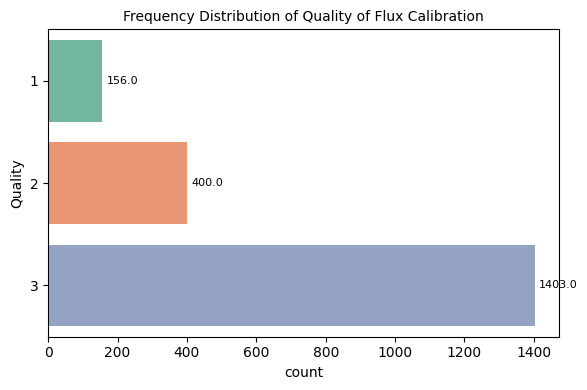

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\2047994719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=attribute, palette='Set2')


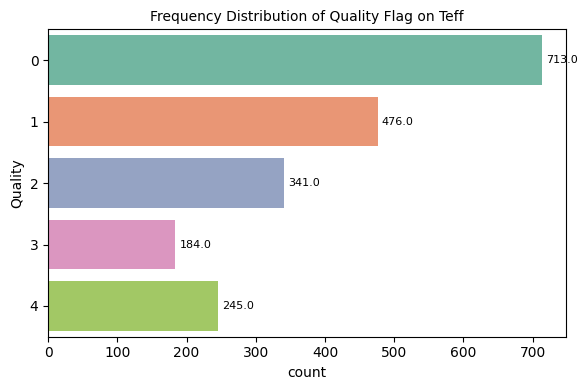

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\2047994719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=attribute, palette='Set2')


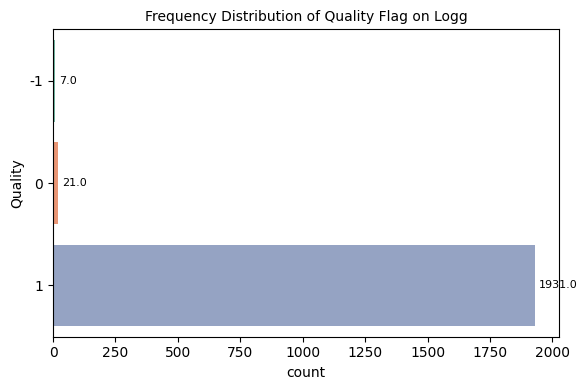

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\2047994719.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y=attribute, palette='Set2')


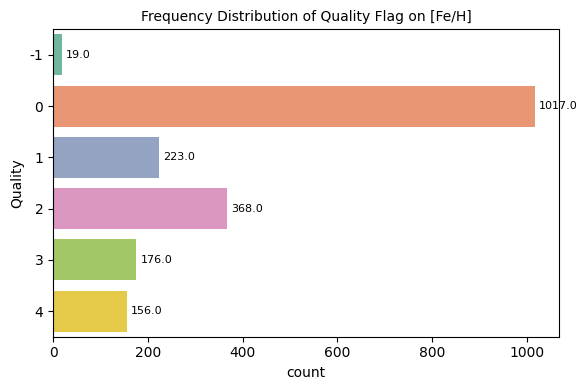

In [18]:
attribute_names = {
    'qf': 'Quality of Flux Calibration',
    'q_teff': 'Quality Flag on Teff',
    'q_logg': 'Quality Flag on Logg',
    'q_[fe/h]': 'Quality Flag on [Fe/H]'
}

categorical_attributes = ['qf', 'q_teff', 'q_logg', 'q_[fe/h]']

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, y=categorical_attributes[0], palette='Set2')
plt.ylabel('Quality')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                fontsize=8, color='black', xytext=(3, 0), textcoords='offset points')
plt.title(f'Frequency Distribution of {attribute_names[categorical_attributes[0]]}', fontsize=10)
plt.tight_layout()
plt.show()

for attribute in categorical_attributes[1:]:
    plt.figure(figsize=(6, 4))
    ax = sns.countplot(data=df, y=attribute, palette='Set2')
    plt.ylabel('Quality')
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                    fontsize=8, color='black', xytext=(3, 0), textcoords='offset points')
    plt.title(f'Frequency Distribution of {attribute_names[attribute]}', fontsize=10)
    plt.tight_layout()
    plt.show()

C:\Users\ibrah\AppData\Local\Temp\ipykernel_12260\706730685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='type', palette='Set2', order=df['type'].value_counts().index)


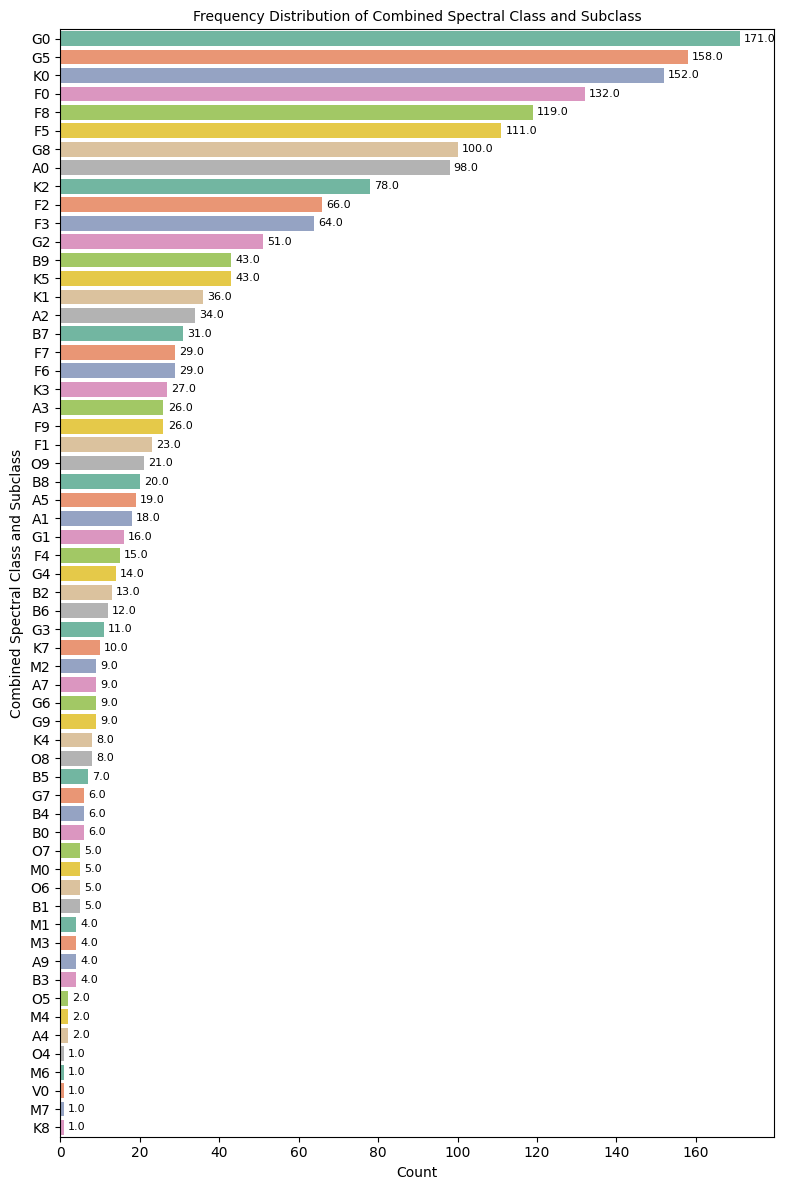

In [19]:
plt.figure(figsize=(8, 12))
ax = sns.countplot(data=df, y='type', palette='Set2', order=df['type'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Combined Spectral Class and Subclass')
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center',
                fontsize=8, color='black', xytext=(3, 0), textcoords='offset points')
plt.title('Frequency Distribution of Combined Spectral Class and Subclass', fontsize=10)
plt.tight_layout()
plt.show()

### 5) Outliers and errors (15p)

1. Using a method of your choice, report the number of outliers for each numeric attribute. Also report how many of them lie below or above the mean.

1. Using quality flags (and some common sense) determine which values for each attribute are due to errors. <br> *(Like model atmosphere fitting failing. Expect to find these at the edges of distributions.)*
    * Create a subset such that rows with erroneous values are discarded. **Work with this subset moving forward.** <br>
    *Normally they would get labeled as missing and handled a different way, but we will discuss this later.*

1. For the columns affected, visualize their distributions again and comment on how the majority of the data is distributed.

In [20]:
z_scores = (num_cols - num_cols.mean()) / num_cols.std()
threshold = 3

outliers = (np.abs(z_scores) > threshold)

num_outliers = outliers.sum()

outliers_above_mean = (num_cols[outliers] > num_cols.mean()).sum()
outliers_below_mean = (num_cols[outliers] < num_cols.mean()).sum()

for col in num_cols.columns:
    if num_outliers[col] > 0:
        print(f"Attribute: {col}, Outliers: {num_outliers[col]}, Above Mean: {outliers_above_mean[col]}, Below Mean: {outliers_below_mean[col]}")

Attribute: airm, Outliers: 22, Above Mean: 22, Below Mean: 0
Attribute: vr, Outliers: 27, Above Mean: 22, Below Mean: 5
Attribute: teff, Outliers: 57, Above Mean: 57, Below Mean: 0
Attribute: logg, Outliers: 7, Above Mean: 0, Below Mean: 7
Attribute: [fe/h], Outliers: 19, Above Mean: 0, Below Mean: 19
Attribute: teffm, Outliers: 87, Above Mean: 87, Below Mean: 0
Attribute: loggm, Outliers: 7, Above Mean: 0, Below Mean: 7
Attribute: [fe/h]m, Outliers: 68, Above Mean: 0, Below Mean: 68
Attribute: hbeta, Outliers: 2, Above Mean: 0, Below Mean: 2
Attribute: fe5709, Outliers: 8, Above Mean: 3, Below Mean: 5
Attribute: tio1, Outliers: 38, Above Mean: 38, Below Mean: 0


In [21]:
# Filtering out rows with quality flags indicating poor determination
erroneous_flags_teff = df['q_teff'] == 1 
erroneous_flags_fe_h = df['q_[fe/h]'] == 1

erroneous_rows_flags = erroneous_flags_teff | erroneous_flags_fe_h

clean_df = df[~erroneous_rows_flags]

In [22]:
print("Shape of clean_df:", clean_df.shape)

Shape of clean_df: (1385, 21)


In [23]:
print("Shape of df:", df.shape)

Shape of df: (1959, 21)


When we discard rows with erroneous values, the distribution of all attributes in the dataset is affected. 

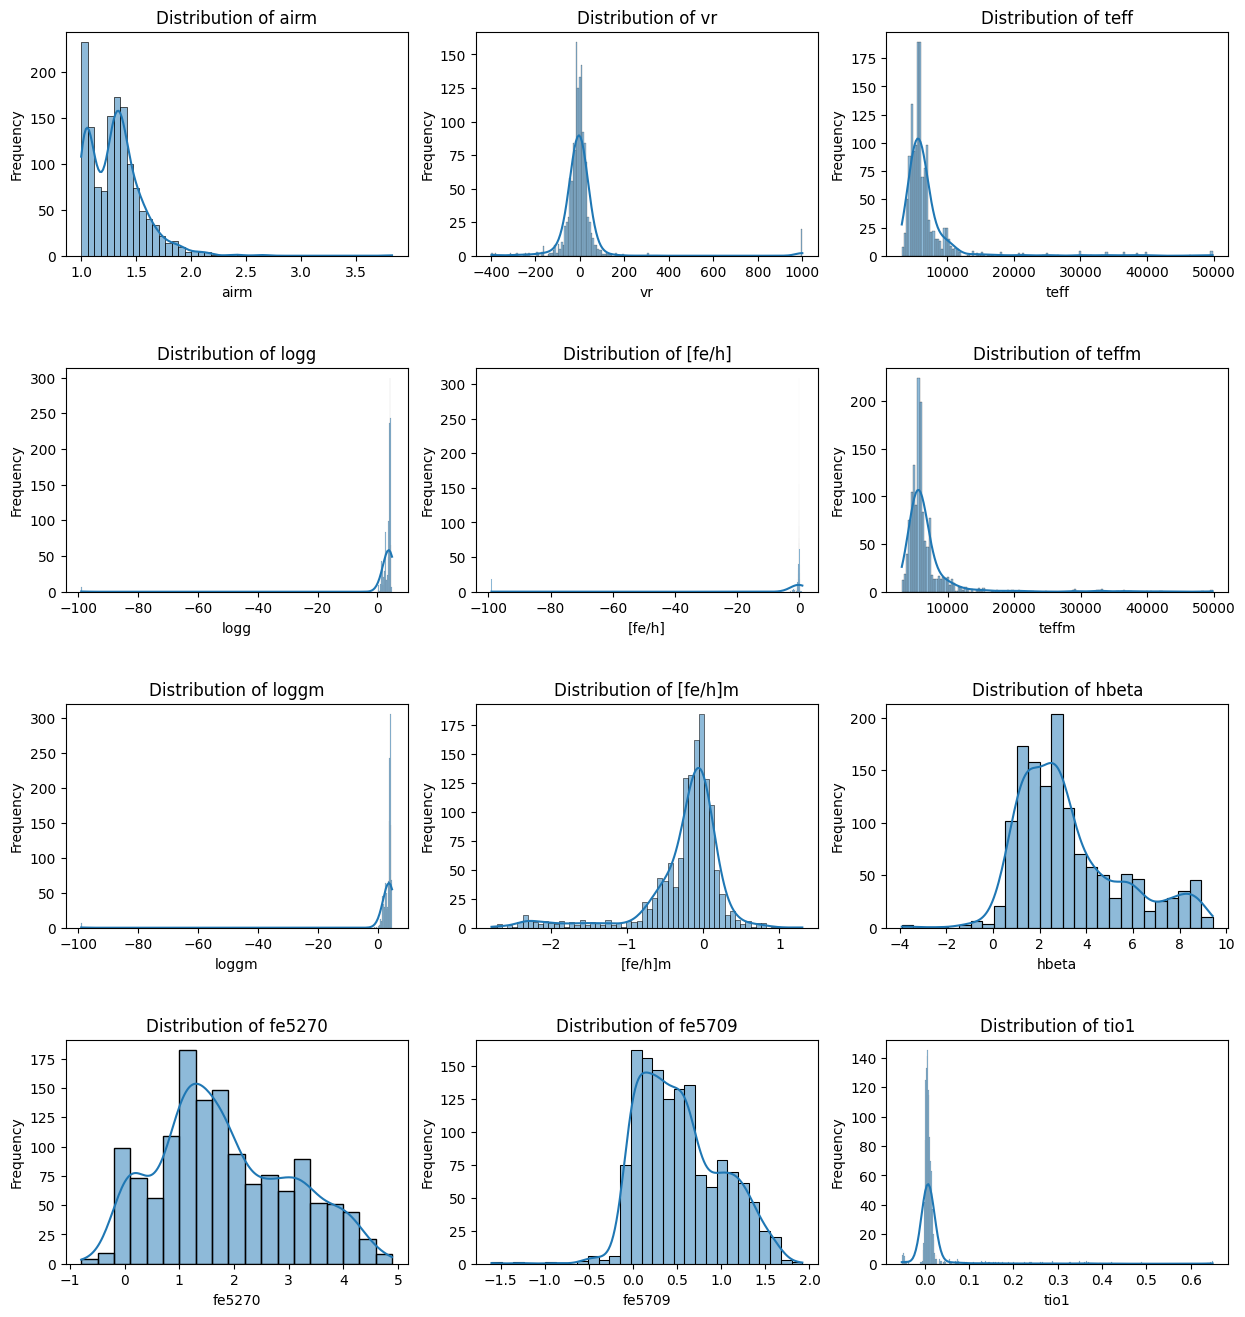

In [24]:
num_cols = clean_df.select_dtypes(include=['float64'])

num_cols_count = len(num_cols.columns)
num_rows = math.ceil(num_cols_count / 3)

plt.figure(figsize=(15, 4 * num_rows))
plt.subplots_adjust(hspace=0.5)
for i, col in enumerate(num_cols.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(clean_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()

In [25]:
outliers = {}
for col in num_cols.columns:
    z_scores = (clean_df[col] - clean_df[col].mean()) / clean_df[col].std()
    col_outliers = clean_df[np.abs(z_scores) > 3][col]
    outliers[col] = col_outliers
print("Outliers:")
for col, vals in outliers.items():
    print(f"{col}: {len(vals)} outliers")

normality_tests = {}
for col in num_cols.columns:
    stat, p = shapiro(clean_df[col])
    normality_tests[col] = (stat, p)

print("\nShapiro-Wilk Test Results:")
for col, (stat, p) in normality_tests.items():
    print(f"{col}: W-statistic = {stat}, p-value = {p}")

Outliers:
airm: 15 outliers
vr: 22 outliers
teff: 29 outliers
logg: 7 outliers
[fe/h]: 18 outliers
teffm: 30 outliers
loggm: 7 outliers
[fe/h]m: 52 outliers
hbeta: 2 outliers
fe5270: 0 outliers
fe5709: 3 outliers
tio1: 30 outliers

Shapiro-Wilk Test Results:
airm: W-statistic = 0.8913524340226231, p-value = 3.7244307820426374e-30
vr: W-statistic = 0.3809829249917065, p-value = 5.978522347742498e-56
teff: W-statistic = 0.433639943802684, p-value = 1.9685197838060636e-54
logg: W-statistic = 0.10160028576678681, p-value = 1.5291713921742669e-62
[fe/h]: W-statistic = 0.10825038001608245, p-value = 2.0875595747292607e-62
teffm: W-statistic = 0.45630750948869436, p-value = 9.641818972612795e-54
loggm: W-statistic = 0.1030180520046926, p-value = 1.6338225888773575e-62
[fe/h]m: W-statistic = 0.7561735491820553, p-value = 4.089553449877223e-41
hbeta: W-statistic = 0.9154387230438702, p-value = 4.063028819711003e-27
fe5270: W-statistic = 0.970736311523962, p-value = 3.854405917293107e-16
fe5709:

The analysis revealed that the majority of numeric attributes in the dataset exhibit non-normal distributions, as indicated by the Shapiro-Wilk test results. Additionally, various attributes have outliers, suggesting potential extreme values in the data. Further investigation and preprocessing may be necessary to address these outliers and ensure the robustness of any subsequent analyses or modeling tasks.

### 6) Quantile-Quantile plots and hypothesis testing (15p)

1.  * Select a variable that looks like it has a normal distribution. Sort it's values from lowest to highest. Assign it to a new array.
    
    * Create an array called "s1" filled with random numbers sampled from the standard normal distribution. $(\mu = 0,\ \ \sigma = 1)$ 
    <br>Then sort this array in an ascending order. Make sure this array has equal length to the array above.
    
    * Assemble a scatter plot with s1 in the x axis and your sorted variable in y axis. Then draw on top (or to the side) a qqplot of your variable using statsmodels.

<br>

2.  * This time, select a variable that has a right skewed distribution, and repeat the operations above.

    * Next, create a similar array called "s2", but this time sample from the rayleigh distribution. $(\sigma = 1)$

    * Assemble another scatterplot using seaborn's `regplot` function. Set `robust=True` and `ci=None` for the regression fit to be robust to outliers coming from random sampling. Also draw another statsmodels qqplot next to it, or on top.

    Do the plots you generate resemble statsmodels' qqplots? **Explain how the similarities came about, as well as any differences.**
    
<br>

3.  * This time apply a single **appropriate** statistical test from the list to check if the selected variables really posess a normal distribution.
        * Pearson's Chi-squared test
        * Shapiro-Wilk test
        * Wilcoxon Signed-Rank test
        * Kruskal-Wallis test

    * State the null hypothesis, find the test statistic and p value for each variable, the level of significance you chose when evaluating the hypotheses and your final judgement on both.

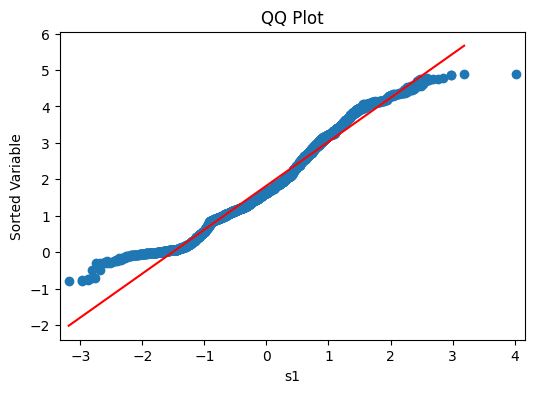

In [26]:
sorted_fe5270 = np.sort(clean_df['fe5270'])

np.random.seed(24)
s1_sorted = np.sort(np.random.standard_normal(size=sorted_fe5270.shape[0]))

plt.figure(figsize=(6, 4))
plt.scatter(s1_sorted, sorted_fe5270, label='Scatter Plot')

sm.qqplot(sorted_fe5270, line='s', ax=plt.gca())
plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.xlabel("s1")
plt.ylabel("Sorted Variable")
plt.show()

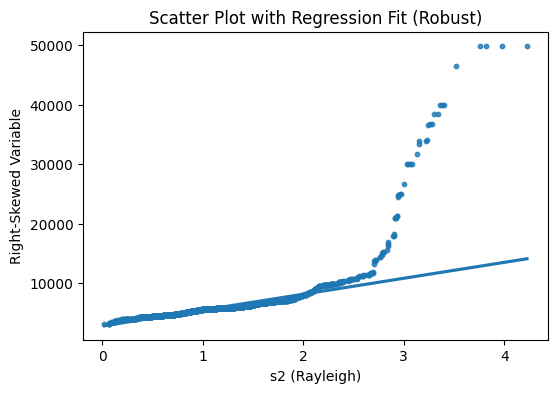

<Figure size 600x400 with 0 Axes>

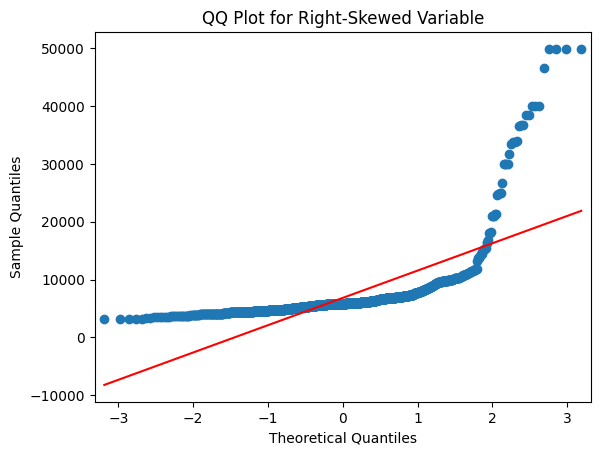

In [27]:
sorted_teff = np.sort(clean_df['teff'])

np.random.seed(24)
s2_sorted = np.sort(np.random.rayleigh(scale=1, size=sorted_teff.shape[0]))

plt.figure(figsize=(6, 4))
sns.regplot(x=s2_sorted, y=sorted_teff, robust=True, ci=None, scatter_kws={'s': 10})
plt.title("Scatter Plot with Regression Fit (Robust)")
plt.xlabel("s2 (Rayleigh)")
plt.ylabel("Right-Skewed Variable")

plt.figure(figsize=(6, 4))
sm.qqplot(sorted_teff, line='s')
plt.title("QQ Plot for Right-Skewed Variable")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

The plots generated in the second question, using seaborn's regplot function, differ from statsmodels' qqplots. While both assess the distribution of the variable and compare it to a theoretical normal distribution, they do so differently. The scatter plot from seaborn focuses on robust regression fit with outliers handled, while statsmodels' qqplots directly compare quantiles to a theoretical distribution. Due to these differences and the use of different datasets, the scatter plot tends to show more noticeable deviations, especially towards the left tail, compared to statsmodels' qqplots, which typically exhibit closer alignment between observed and theoretical quantiles.

* The null and alternative hypotheses for the Shapiro-Wilk test:

Null hypothesis (H0): The data follows a normal distribution. <br>
Alternative hypothesis (H1): The data does not follow a normal distribution.

In [28]:
# Perform Shapiro-Wilk test for fe5270
stat_fe5270, p_value_fe5270 = stats.shapiro(clean_df['fe5270'])
print("fe5270 Shapiro-Wilk Test:")
print("Test Statistic:", stat_fe5270)
print("p-value:", p_value_fe5270)
if p_value_fe5270 < 0.05:
    print("Result: Reject null hypothesis. fe5270 is not normally distributed.")
else:
    print("Result: Fail to reject null hypothesis. fe5270 may be normally distributed.")

# Perform Shapiro-Wilk test for teff
stat_teff, p_value_teff = stats.shapiro(clean_df['teff'])
print("\nfe5709 Shapiro-Wilk Test:")
print("Test Statistic:", stat_teff)
print("p-value:", p_value_teff)
if p_value_teff < 0.05:
    print("Result: Reject null hypothesis. teff is not normally distributed.")
else:
    print("Result: Fail to reject null hypothesis. teff may be normally distributed.")

fe5270 Shapiro-Wilk Test:
Test Statistic: 0.970736311523962
p-value: 3.854405917293107e-16
Result: Reject null hypothesis. fe5270 is not normally distributed.

fe5709 Shapiro-Wilk Test:
Test Statistic: 0.433639943802684
p-value: 1.9685197838060636e-54
Result: Reject null hypothesis. teff is not normally distributed.


### 7) Correlations (15p)

* Generate a pairwise pearson correlation matrix of numeric attributes. 

* Visualise them with correlation coefficients visible and comment on any potentially interesting relationships.

* Answer the following and give an example from our dataset:
    * What is the pearson correlation coefficient not sensitive to? <br> For such cases, what can be done to assess whether there is a relationship?

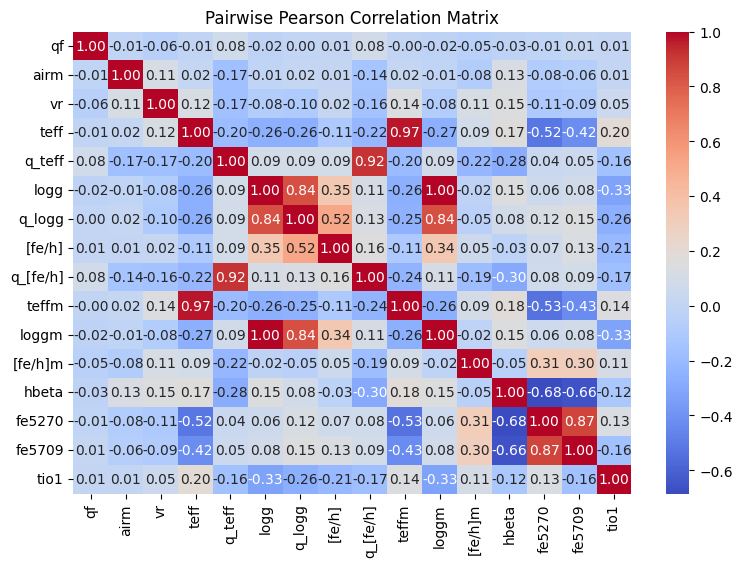

In [29]:
numeric_df = clean_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pairwise Pearson Correlation Matrix")
plt.show()

* Q_Teff and Q_[Fe/H] (correlation coefficient: 0.92): This indicates a strong positive correlation between the quality flags for effective temperature measurements and the quality flags for metallicity measurements.

* Teff and fe5270 (correlation coefficient: -0.52): This suggests a moderate negative linear relationship between the effective temperature and the iron absorption line at 5270 Angstroms.

* Hbeta and fe5270 (correlation coefficient: -0.68): This suggests a moderately strong negative linear relationship between the H-beta line and the iron absorption line at 5270 Angstroms.

The Pearson correlation coefficient is not sensitive to the scale of measurement or the units in which the variables are expressed. This means that it remains unchanged regardless of whether the variables are measured in kilometers, degrees Celsius, or any other unit. For example, the correlation between two variables, such as Teff (effective temperature) and Vr (heliocentric radial velocity), would be the same whether Teff is measured in Kelvin or Celsius.

While Pearson correlation measures the linear relationship between two variables, it might not capture non-linear associations effectively. Therefore, we should be cautious in relying solely on Pearson correlation and consider exploring other correlation measures or non-linear modeling techniques if the relationships in our data appear to be non-linear. **Additionally, it's essential to verify the assumptions of Pearson correlation, such as normality and homoscedasticity, to ensure the reliability of the results.**

### 8) The spectral sequence (10p)

Use graphs (or `groupby`) to explore which features have different distributions according to the star's main class. (The column you created named 'spec'.)

Discuss the importance of such features for modelling. 

*Recall that the main type and subtype are collectively called the "temperature class". But there might be other useful features.*

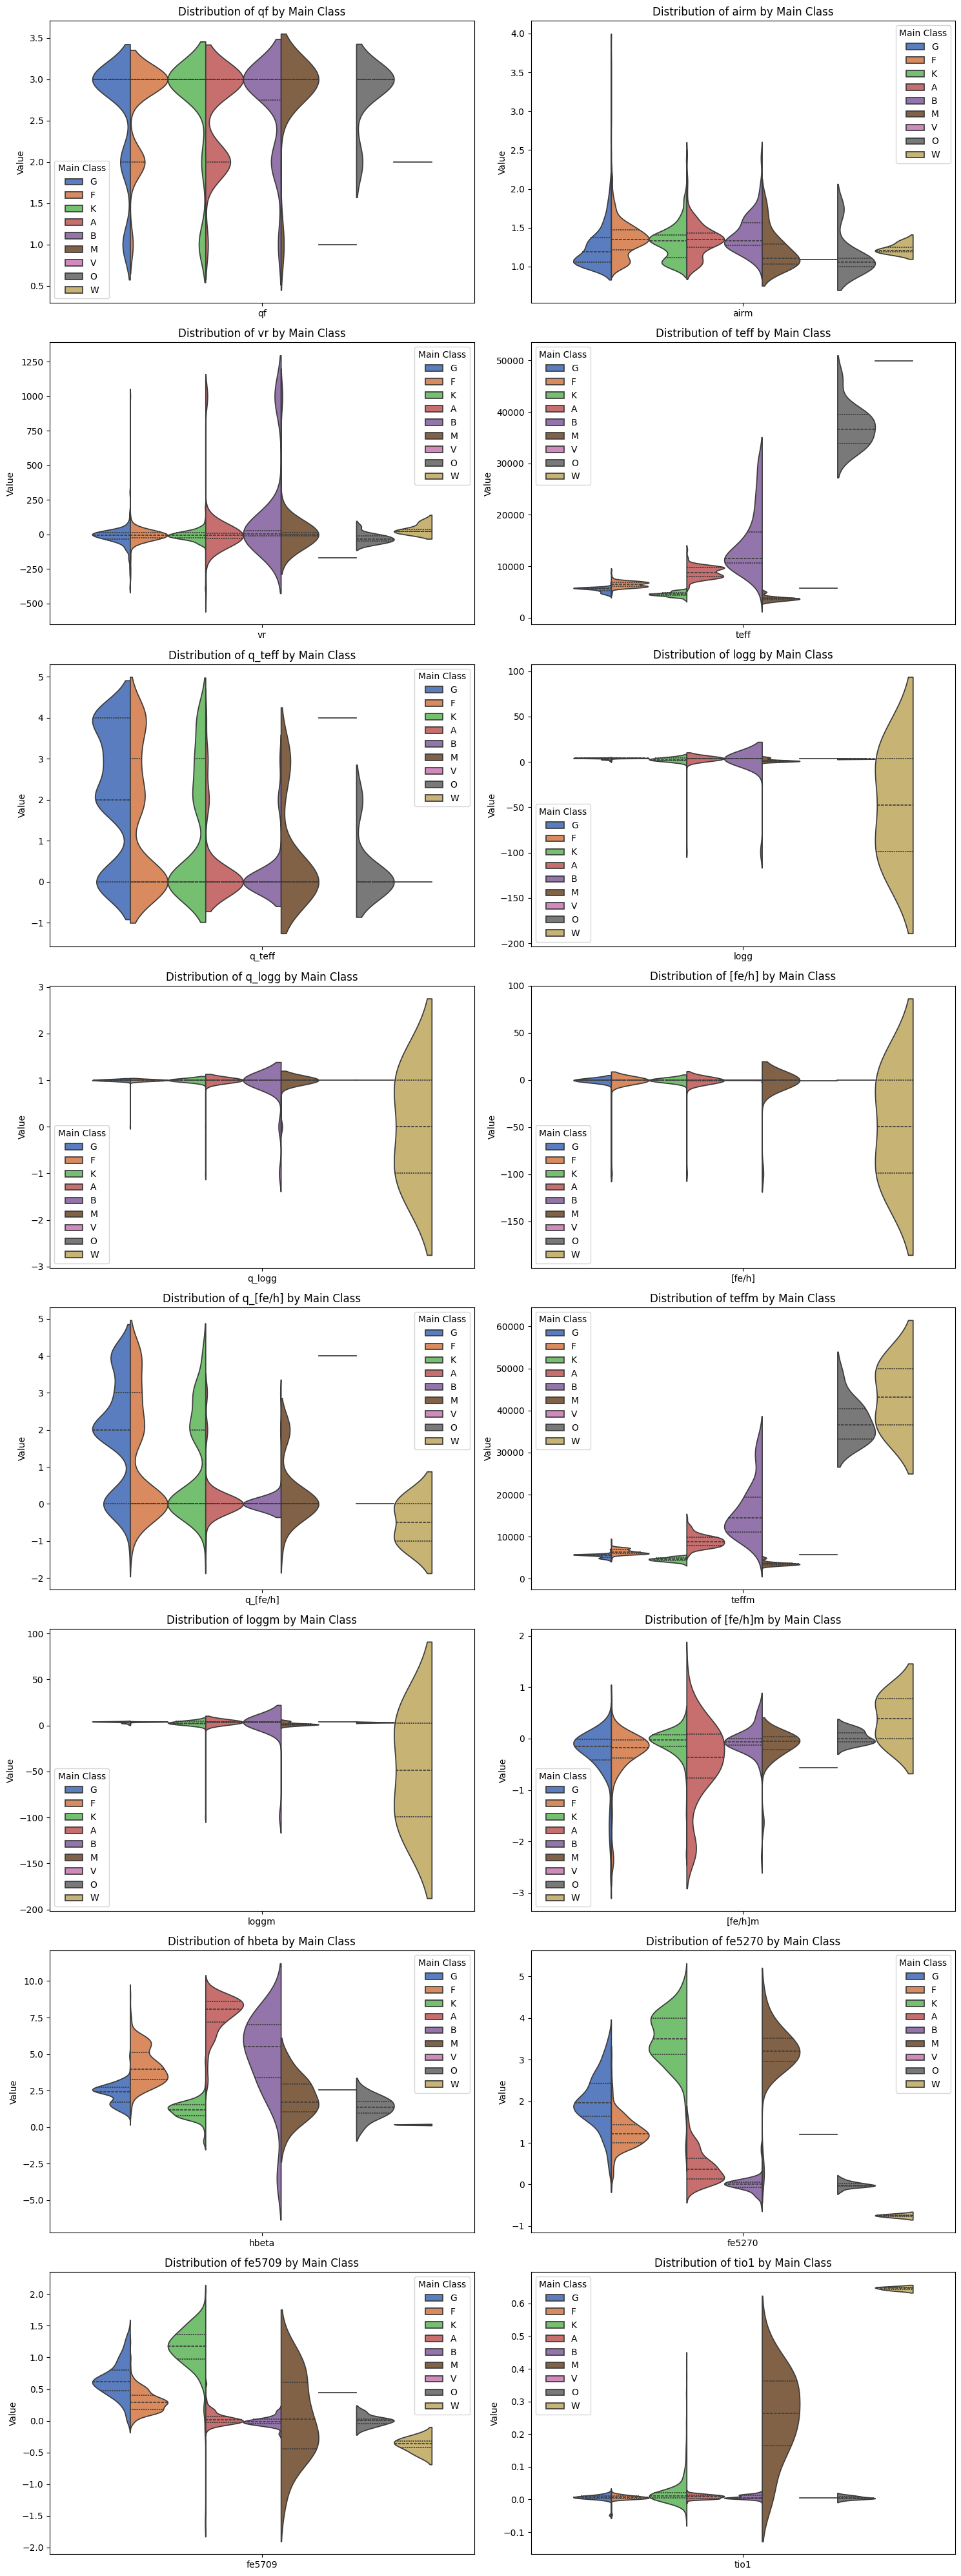

In [30]:
columns_to_remove = ['name', 'sptype', 'sub', 'type']
df_filtered = clean_df.drop(columns=columns_to_remove)

df_melted = df_filtered.melt(id_vars=['spec'], var_name='Feature', value_name='Value')

# Get unique features
features = df_melted['Feature'].unique()

# Calculate the number of rows and columns for subplots
num_features = len(features)
num_rows = (num_features + 1) // 2  # Ensure at least one row
num_cols = min(num_features, 2)

# Plot violin plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5*num_rows))

# Flatten axes for easier iteration
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(data=df_melted[df_melted['Feature'] == feature], x='Feature', y='Value', hue='spec', split=True, inner='quartile', palette='muted', ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Main Class')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Value')
    axes[i].legend(title='Main Class')

# Remove empty subplots
for j in range(num_features, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Each histogram represents the frequency or occurrence of a specific attribute within each spectral class. By comparing the shapes and positions of the histograms, we can identify similarities and differences in attribute distributions across spectral classes. <br>The most notable observation is the absence of attribute distributions for Class V stars. This absence could indicate either a lack of relevant data for this particular class or that the attributes measured in the dataset are not applicable or observable for Class V stars.<br>For Class W stars, the existence of attribute distributions contrasts with other classes. This suggests that Class W stars might possess distinct characteristics or exhibit different physical properties compared to other spectral classes. Understanding the unique features of Class W stars could be crucial for modeling and interpreting their behavior accurately.<br> **Features with varied distributions across spectral classes are crucial for modeling stellar properties. These features provide discriminatory power, improve model performance, offer insights into underlying physical processes, aid in feature selection and dimensionality reduction, and enhance model generalization and robustness. By incorporating such features, models can accurately distinguish between different types of stars, leading to a deeper understanding of stellar evolution and behavior.**